## Project Idea 2: Supply Chain Dataset Analysis

## Week 1: Build Data Model, Data Cleaning and Preprocessing
### Tasks:
#### Data Preprocessing: Build a data model and clean and preprocess the data.
### Tools: 
#### SQL, Python (pandas, Matplotlib).
### Deliverables:
#### Cleaned dataset ready for analysis.
#### Data preprocessing notebook.


In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt # for visualization
import plotly.express as px
import seaborn as sns
 
from scipy.stats import chi2_contingency 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from statsmodels.tsa.arima.model import ARIMA
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder

 

pd.set_option('display.max_columns', None)
 

In [5]:
# Read CSV file into DataFrame
df = pd.read_csv("./supply_chain_data.csv")

In [6]:
df.head()

Product type   SKU      Price  Availability  Number of products sold  \
0     haircare  SKU0  69.808006            55                      802   
1     skincare  SKU1  14.843523            95                      736   
2     haircare  SKU2  11.319683            34                        8   
3     skincare  SKU3  61.163343            68                       83   
4     skincare  SKU4   4.805496            26                      871   

   Revenue generated Customer demographics  Stock levels  Lead times  \
0        8661.996792            Non-binary            58           7   
1        7460.900065                Female            53          30   
2        9577.749626               Unknown             1          10   
3        7766.836426            Non-binary            23          13   
4        2686.505152            Non-binary             5           3   

   Order quantities  Shipping times Shipping carriers  Shipping costs  \
0                96               4         Carrier B        2.956572   
1                37               2         Carrier A        9.716575   
2                88               2         Carrier B        8.054479   
3                59               6         Carrier C        1.729569   
4                56               8         Carrier A        3.890548   

  Supplier name Location  Lead time  Production volumes  \
0    Supplier 3   Mumbai         29                 215   
1    Supplier 3   Mumbai         23                 517   
2    Supplier 1   Mumbai         12                 971   
3    Supplier 5  Kolkata         24                 937   
4    Supplier 1    Delhi          5                 414   

   Manufacturing lead time  Manufacturing costs Inspection results  \
0                       29            46.279879            Pending   
1                       30            33.616769            Pending   
2                       27            30.688019            Pending   
3                       18            35.624741               Fail   
4                        3            92.065161               Fail   

   Defect rates Transportation modes   Routes       Costs  
0      0.226410                 Road  Route B  187.752075  
1      4.854068                 Road  Route B  503.065579  
2      4.580593                  Air  Route C  141.920282  
3      4.746649                 Rail  Route A  254.776159  
4      3.145580                  Air  Route A  923.440632

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

### 1. **Object (Categorical)**

| Column                   | Description                                | Normal Data Type | Wrangling Process                                  |
|---------------------------|--------------------------------------------|------------------|---------------------------------------------------|
| Product type              | Type/category of product (e.g., skincare, haircare, cosmetics)                  | object           | Verify consistency, check for spelling variations  |
| SKU                       | Stock Keeping Unit, unique product code    | object           | Ensure uniqueness, remove duplicates              |
| Customer demographics     | Demographic information of customers       | object           | Standardize values if categorical                 |
| Shipping carriers         | Names of shipping carriers used            | object           | Ensure consistency, map to consistent categories   |
| Supplier name             | Name of the supplier                       | object           | Remove duplicates, clean text                     |
| Location                  | Location of the supplier                   | object           | Standardize location names                        |
| Inspection results        | Results of product inspections (pass/fail) | object           | Normalize categories, convert to binary if needed |
| Transportation modes      | Types of transportation used (e.g., air)   | object           | Ensure consistent categories, map values          |
| Routes                    | Shipping routes used                       | object           | Standardize route descriptions                    |

### 2. **Float (Numerical)**

| Column               | Description                                       | Normal Data Type | Wrangling Process                                   |
|----------------------|---------------------------------------------------|------------------|----------------------------------------------------|
| Price                | Price of the product                              | float64          | Handle missing values, check for outliers           |
| Revenue generated    | Total revenue generated from products             | float64          | Handle missing values, check for outliers           |
| Shipping costs       | Cost of shipping for the product                  | float64          | Handle missing values, check for negative values    |
| Manufacturing costs  | Costs associated with manufacturing the product   | float64          | Handle missing values, check for outliers           |
| Defect rates         | Percentage of defective products                  | float64          | Handle missing values, check for outliers           |
| Costs                | Costs associated with transportation or production| float64          | Handle missing values, check for outliers           |

### 3. **Integer (Numerical)**

| Column                   | Description                                     | Normal Data Type | Wrangling Process                                    |
|--------------------------|-------------------------------------------------|------------------|-----------------------------------------------------|
| Availability              | Availability status (e.g., 1 for available)     | int64            | Convert binary categories if needed                  |
| Number of products sold   | Total number of units sold                      | int64            | Handle missing values, check for negative values      |
| Stock levels              | Quantity of stock available                    | int64            | Check for negative values                            |
| Lead times                | Time taken to replenish stock in days           | int64            | Handle missing values, check for zero or negative values |
| Order quantities          | Quantity of products ordered                   | int64            | Check for negative values                            |
| Shipping times            | Time taken to ship in days                     | int64            | Handle missing values, check for negative values      |
| Production volumes        | Total number of units produced                 | int64            | Handle missing values, check for outliers            |
| Manufacturing lead time   | Time taken to manufacture product in days      | int64            | Handle missing values, check for negative values      |




### General Wrangling Tips:
1. **Null values**: Ensure no null values are present, as indicated by "100 non-null".
2. **Outlier detection**: Particularly for numerical columns like `Price`, `Revenue generated`, `Lead times`, and `Costs`, watch for outliers that may indicate data entry errors.
4. **Data type verification**: Ensure each column has the correct data type, and consider converting `object` types to categorical if necessary for performance.

In [10]:
# converting object types to categorical 
for col in df.columns:
    if df[col].dtype =="object":
        df[col] = df[col].astype('category')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Product type             100 non-null    category
 1   SKU                      100 non-null    category
 2   Price                    100 non-null    float64 
 3   Availability             100 non-null    int64   
 4   Number of products sold  100 non-null    int64   
 5   Revenue generated        100 non-null    float64 
 6   Customer demographics    100 non-null    category
 7   Stock levels             100 non-null    int64   
 8   Lead times               100 non-null    int64   
 9   Order quantities         100 non-null    int64   
 10  Shipping times           100 non-null    int64   
 11  Shipping carriers        100 non-null    category
 12  Shipping costs           100 non-null    float64 
 13  Supplier name            100 non-null    category
 14  Location   

### Check for negative values

In [13]:
df.describe()
# from min row no negative 

Price  Availability  Number of products sold  Revenue generated  \
count  100.000000    100.000000               100.000000         100.000000   
mean    49.462461     48.400000               460.990000        5776.048187   
std     31.168193     30.743317               303.780074        2732.841744   
min      1.699976      1.000000                 8.000000        1061.618523   
25%     19.597823     22.750000               184.250000        2812.847151   
50%     51.239831     43.500000               392.500000        6006.352023   
75%     77.198228     75.000000               704.250000        8253.976921   
max     99.171329    100.000000               996.000000        9866.465458   

       Stock levels  Lead times  Order quantities  Shipping times  \
count    100.000000  100.000000        100.000000      100.000000   
mean      47.770000   15.960000         49.220000        5.750000   
std       31.369372    8.785801         26.784429        2.724283   
min        0.000000    1.000000          1.000000        1.000000   
25%       16.750000    8.000000         26.000000        3.750000   
50%       47.500000   17.000000         52.000000        6.000000   
75%       73.000000   24.000000         71.250000        8.000000   
max      100.000000   30.000000         96.000000       10.000000   

       Shipping costs   Lead time  Production volumes  \
count      100.000000  100.000000          100.000000   
mean         5.548149   17.080000          567.840000   
std          2.651376    8.846251          263.046861   
min          1.013487    1.000000          104.000000   
25%          3.540248   10.000000          352.000000   
50%          5.320534   18.000000          568.500000   
75%          7.601695   25.000000          797.000000   
max          9.929816   30.000000          985.000000   

       Manufacturing lead time  Manufacturing costs  Defect rates       Costs  
count                100.00000           100.000000    100.000000  100.000000  
mean                  14.77000            47.266693      2.277158  529.245782  
std                    8.91243            28.982841      1.461366  258.301696  
min                    1.00000             1.085069      0.018608  103.916248  
25%                    7.00000            22.983299      1.009650  318.778455  
50%                   14.00000            45.905622      2.141863  520.430444  
75%                   23.00000            68.621026      3.563995  763.078231  
max                   30.00000            99.466109      4.939255  997.413450

### Check for duplicate data

In [15]:
if df.duplicated().any():
    print(f"There are as many as {df.duplicated().sum()} duplicate data.")
else:
    print("There are no duplicate data.")

There are no duplicate data.


### Check for Outlier

In [17]:
#Outlier detection
flag=0
for column in df.columns:    
    if df[column].dtype=="int64" or df[column].dtype =="float64":      
        max_value = df[column].max()
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        outlier_threshold = Q3 + 1.5 * IQR
        if max_value > outlier_threshold :        
            print(f"{column} has an outlier: {max_value}")
            flag=1
if flag==0:
     print("There is No Outlier")

There is No Outlier


## Univariate Analysis using Box Plot and Histograms

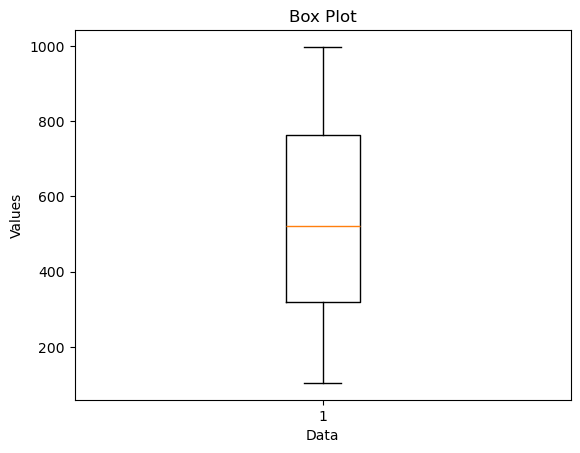

In [19]:
plt.boxplot(df["Costs"])
plt.xlabel('Data')
plt.ylabel('Values')
plt.title('Box Plot')
plt.show()

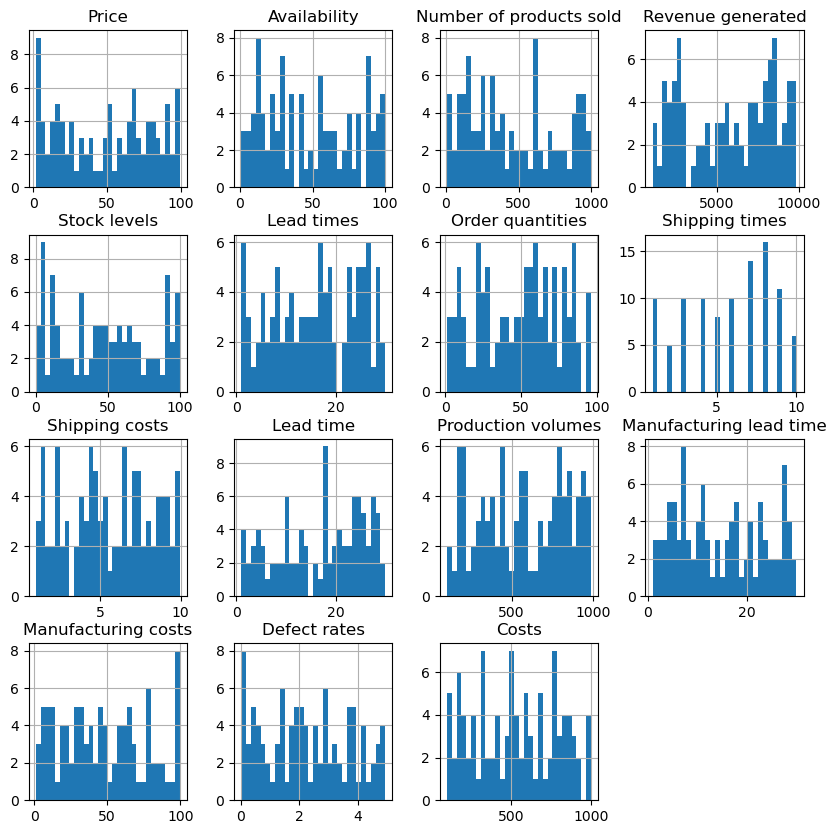

In [20]:
df.hist(figsize=(10,10), bins=30);

### From the code and the charts clearly that There is No Outlier

## Saving Cleaned dataset ready for analysis

In [23]:
# Save DataFrame as a Pickle file
df.to_pickle('./clean_supply_chain_data.pkl')

## Week 2: Analysis Questions Phase

### Tasks:

* **Determine Data Analysis Questions:** Identify all potential analysis questions that can be derived from the given dataset and would be valuable to the organization's decision-makers. For example, "What is the impact of product category on revenue?"
* **Tools:** SQL, Python (pandas, Matplotlib)

### Deliverables:

* A collection of analysis questions that can be answered using the dataset.

| Analysis Question | Data Items | Visual |
|---|---|---|
| What is the impact of product category on revenue? | Product type, Revenue generated | Bar chart |
| How does price affect product sales? | Price, Number of products sold | Scatter plot |
| What is the relationship between stock levels and lead times? | Stock levels, Lead times | Scatter plot |
| Are there any trends in order quantities over time? | Order quantities, Time (e.g., month, quarter) | Line chart |
| Which shipping carriers are most efficient? | Shipping carriers, Shipping times | Bar chart |
| How do manufacturing lead times impact production volumes? | Manufacturing lead times, Production volumes | Scatter plot |
| What is the relationship between defect rates and inspection results? | Defect rates, Inspection results | Bar chart or pie chart |
| What is the cost breakdown for different transportation modes? | Transportation modes, Costs | Bar chart |
| Are there any correlations between shipping costs and shipping distances? | Shipping costs, Distance (e.g., calculated based on routes) | Scatter plot |
| How do customer demographics influence purchasing behavior? | Customer demographics, Product type, Number of products sold | Grouped bar chart or stacked bar chart |

##  Bivariate Analysis using Correlation analysis, scatter plots

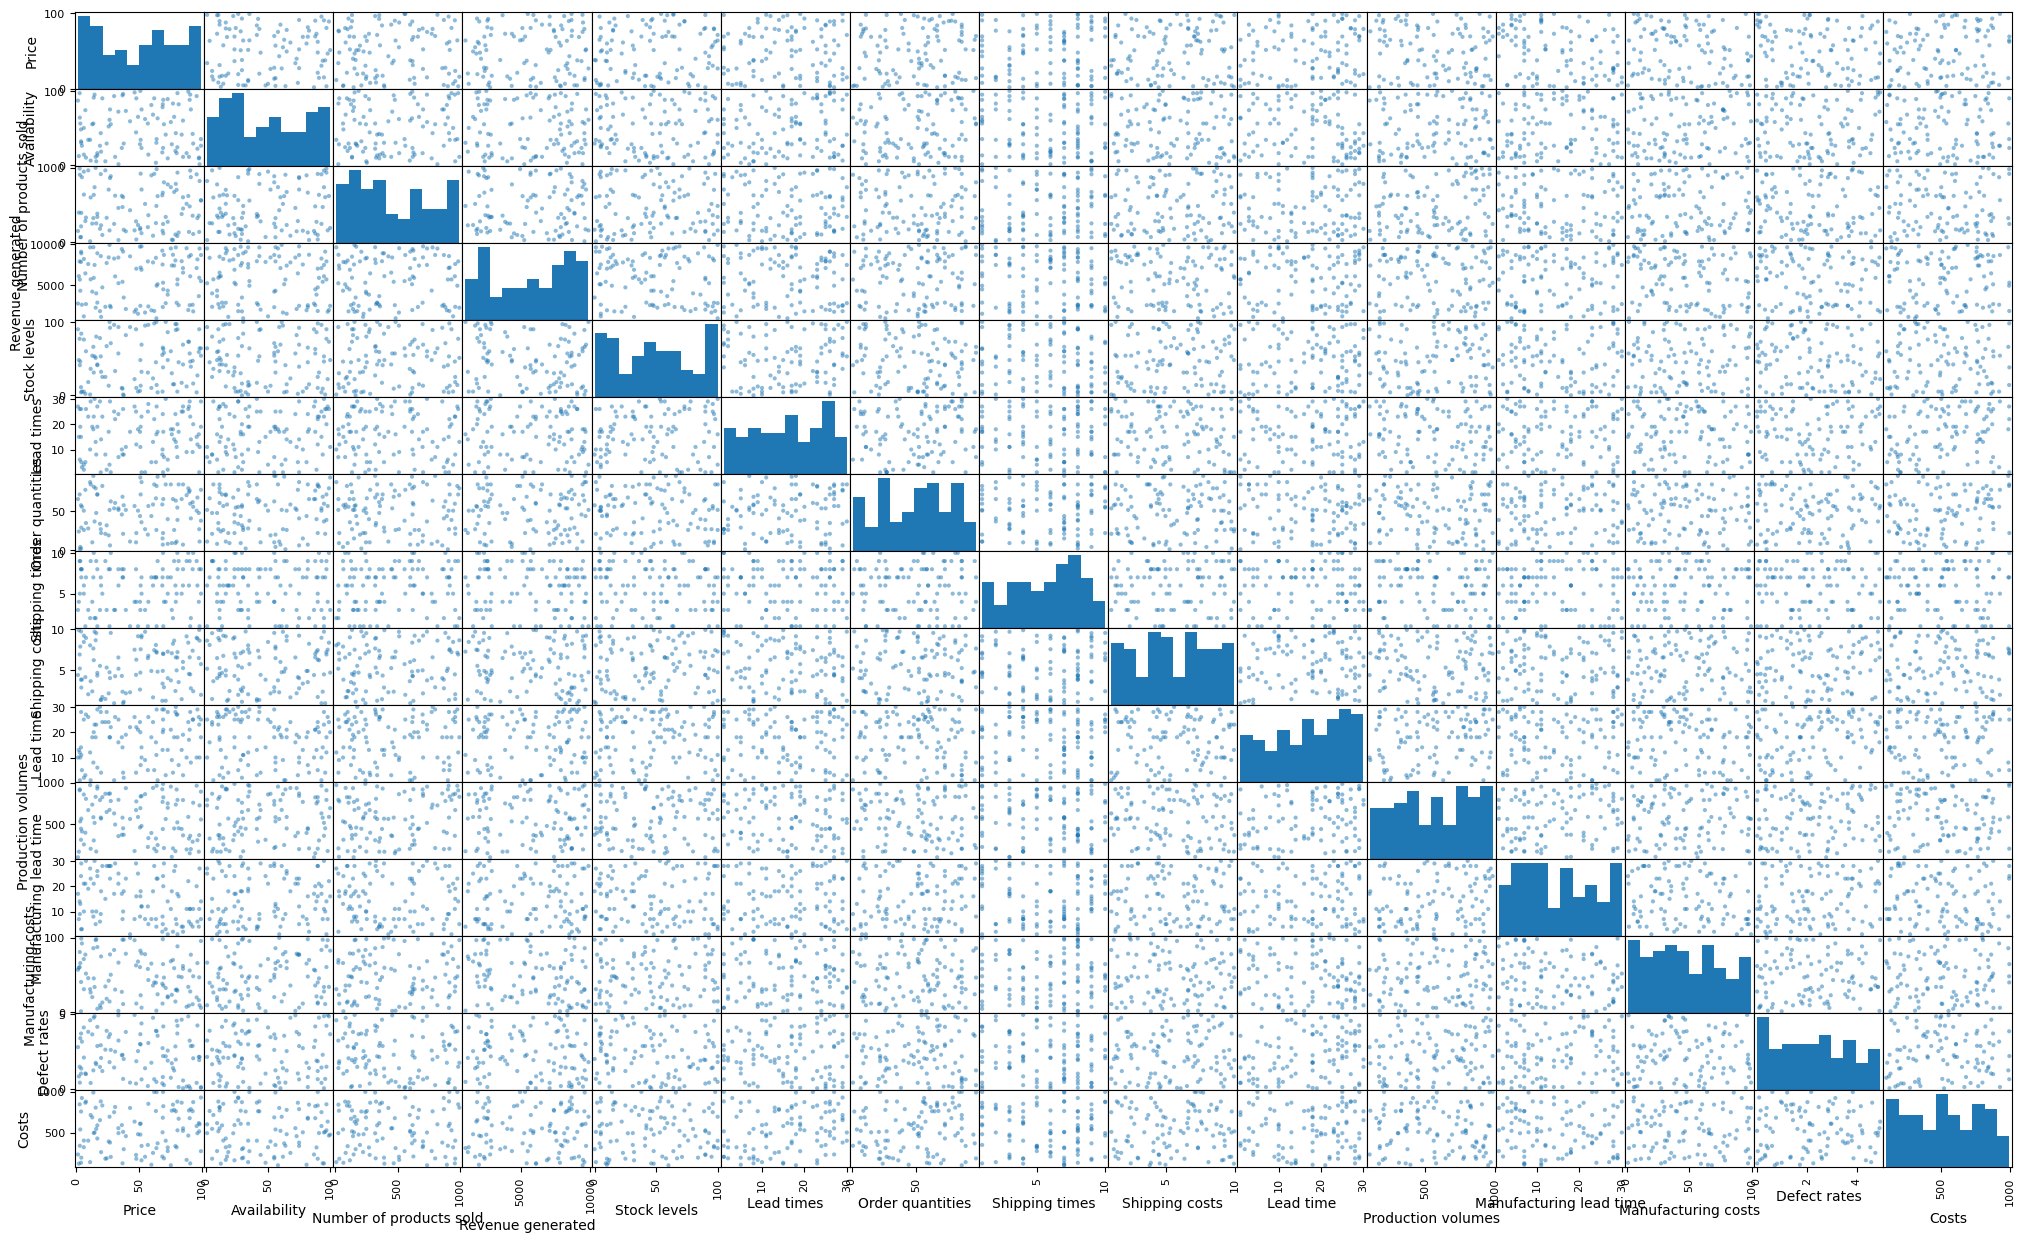

In [27]:
pd.plotting.scatter_matrix(df, figsize = (25,15));

## Check Correlation 

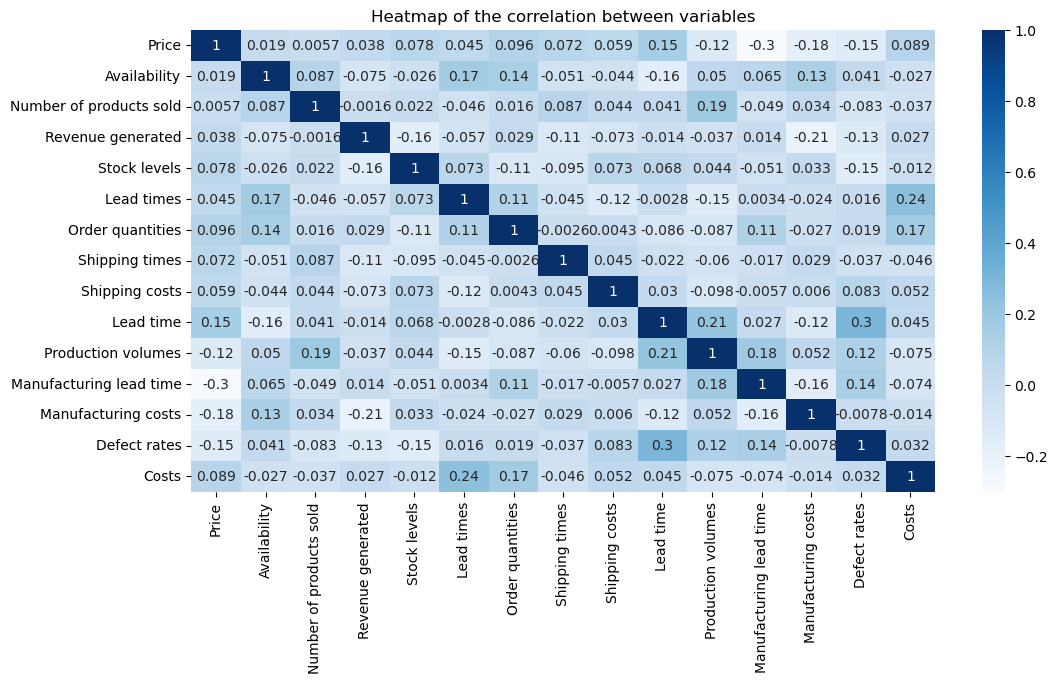

In [29]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title('Heatmap of the correlation between variables')
plt.show()

### There is no Correlation except 
   #### a week one between Defect rates and Lead time 
   #### a week negative one between Price and Manufacturing costs

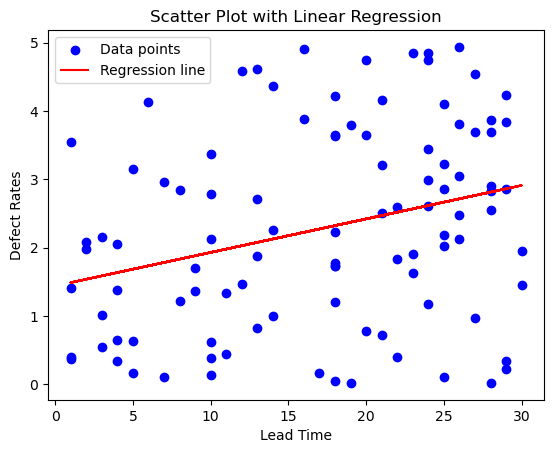

In [31]:
# Extract x and y values from the DataFrame
x = df['Lead time']
y = df['Defect rates']

plt.scatter(x, y, color='blue', label='Data points')

# Fit a linear regression model
model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)

# Predict defect rates based on the model
predicted_defect_rates = model.predict(x.values.reshape(-1, 1))

# Plot the regression line
plt.plot(x, predicted_defect_rates, color='red', label='Regression line')

# Add labels and a title
plt.xlabel('Lead Time')
plt.ylabel('Defect Rates')
plt.title('Scatter Plot with Linear Regression')

# Show the plot
plt.legend()
plt.show()
 

## we will search in category attributes 

In [33]:
def chi2(x,y):    
    # Create a contingency table
    contingency_table = pd.crosstab(x, y)
    
    # Perform the Chi-Square Test
    chi2_stat, p_value, dof, expected_frequencies = chi2_contingency(contingency_table)

    if p_value<0.05 :
        print("Testing " + x.name + " vs " + y.name)
        print(contingency_table)
        print("Chi-Square Statistic:", chi2_stat)
        print("P-Value:", p_value)
        print("Degrees of Freedom:", dof)
        #print("Expected Frequencies:\n", expected_frequencies)
        return p_value
    return 1    

In [107]:
# chi2 at least on of them is category
for column1 in df.columns:    
    for column2 in df.columns:
        if df[column1].dtype=="category" \
        and df[column2].dtype=="category" \
        and column1<column2 \
        and chi2(df[column1],df[column2]) != 1 :             
            print("\n")        

Testing Product type vs Supplier name
Supplier name  Supplier 1  Supplier 2  Supplier 3  Supplier 4  Supplier 5
Product type                                                             
cosmetics               7           7           1           4           7
haircare                5          10           5          10           4
skincare               15           5           9           4           7
Chi-Square Statistic: 15.842314548196901
P-Value: 0.044693493546598455
Degrees of Freedom: 8


Testing Customer demographics vs Product type
Product type           cosmetics  haircare  skincare
Customer demographics                               
Female                        10         2        13
Male                           4        10         7
Non-binary                     5         7        11
Unknown                        7        15         9
Chi-Square Statistic: 13.082213806873488
P-Value: 0.041748804605098555
Degrees of Freedom: 6


Testing Supplier name vs Transportatio

## expected relations 

## What is the impact of product category on revenue?

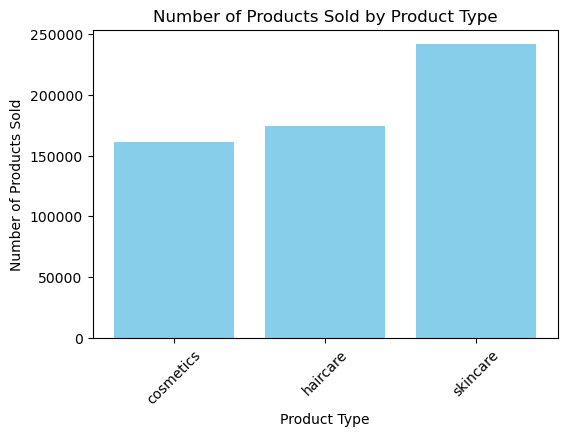

In [37]:
# Group the data by 'Product type' and sum 'Number of products sold' and 'Revenue generated'
grouped_data = df.groupby('Product type',observed=True).agg({
    'Number of products sold': 'sum',
    'Revenue generated': 'sum'
})

# Create a bar chart for the number of products sold by product type
plt.figure(figsize=(6, 4))  # Set the size of the chart

# X-axis: Product type, Y-axis: Number of products sold

plt.bar(grouped_data.index, grouped_data['Revenue generated'], color='skyblue')

# Add labels and title
plt.xlabel('Product Type')  # X-axis label
plt.ylabel('Number of Products Sold')  # Y-axis label
plt.title('Number of Products Sold by Product Type')  # Title

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)
# Display the chart
plt.show()

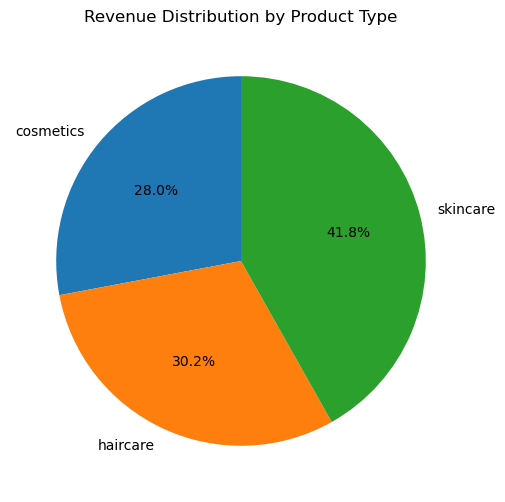

In [38]:
data = df.groupby('Product type', observed=True) ['Revenue generated'].sum()
#create the pie chart
plt.figure(figsize = (6, 6))
plt.pie(data, labels=data.index,autopct='%1.1f%%', startangle=90)
plt.title('Revenue Distribution by Product Type')
plt.show()

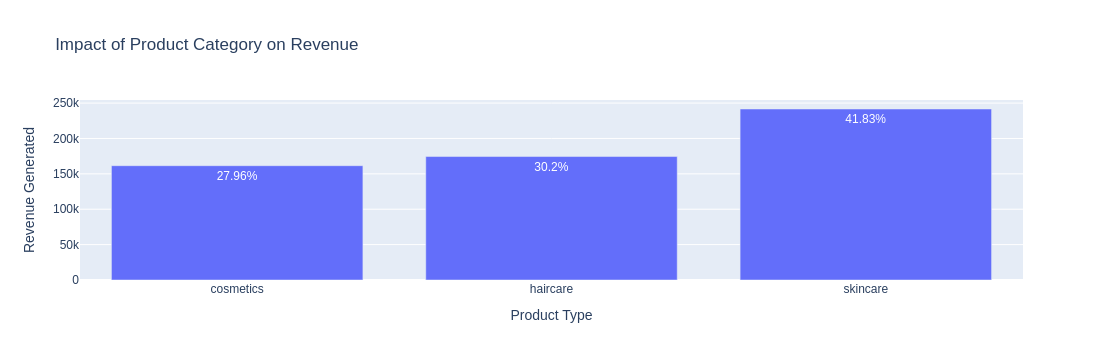

In [39]:
revenue_by_product = df.groupby('Product type', observed=True)['Revenue generated'].sum().reset_index()
# Calculate the total revenue
total_revenue = revenue_by_product['Revenue generated'].sum()

# Calculate the percentage of total revenue for each product type
revenue_by_product['Percent of Total'] = ((revenue_by_product['Revenue generated'] / total_revenue) * 100).round(2).astype(str) + '%'

fig = px.bar(revenue_by_product, x='Product type', y='Revenue generated', title='Impact of Product Category on Revenue', text='Percent of Total')
fig.update_xaxes(title_text='Product Type')  # Update x-axis label
fig.update_yaxes(title_text='Revenue Generated')  # Update y-axis label
fig.show()

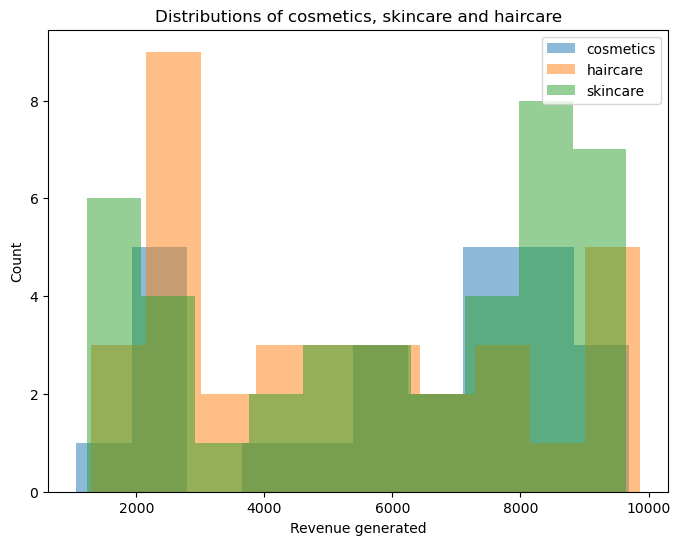

In [40]:
df_cosmetics=df[df["Product type"]=="cosmetics"]
df_haircare=df[df["Product type"]=="haircare"]
df_skincare=df[df["Product type"]=="skincare"]

fig, ax = plt.subplots(figsize =(8,6))
ax.hist(df_cosmetics['Revenue generated'], alpha=0.5, label='cosmetics')
ax.hist(df_haircare['Revenue generated'], alpha=0.5, label='haircare')
ax.hist(df_skincare['Revenue generated'], alpha=0.5, label='skincare')
ax.set_title('Distributions of cosmetics, skincare and haircare')
ax.set_xlabel('Revenue generated')
ax.set_ylabel('Count')
ax.legend(loc='upper right')
plt.show();

# How do customer demographics influence purchasing behavior?

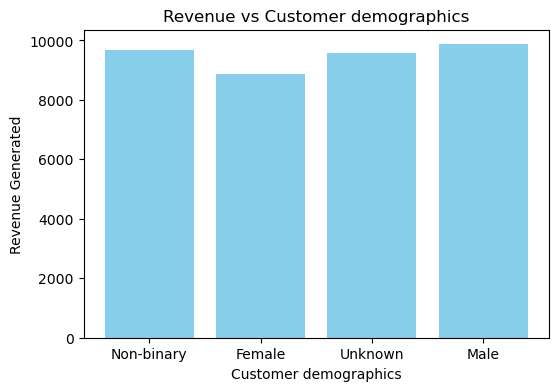

In [42]:
plt.figure(figsize=(6, 4))  # Set the size of the chart 
plt.bar(df['Customer demographics'], df['Revenue generated'], color='skyblue')
# Add labels and title
plt.xlabel('Customer demographics')  # X-axis label
plt.ylabel('Revenue Generated')        # Y-axis label
plt.title('Revenue vs Customer demographics')  # Title
# Display the chart
plt.show()

## How do customer demographics influence purchasing behavior of different Product types?

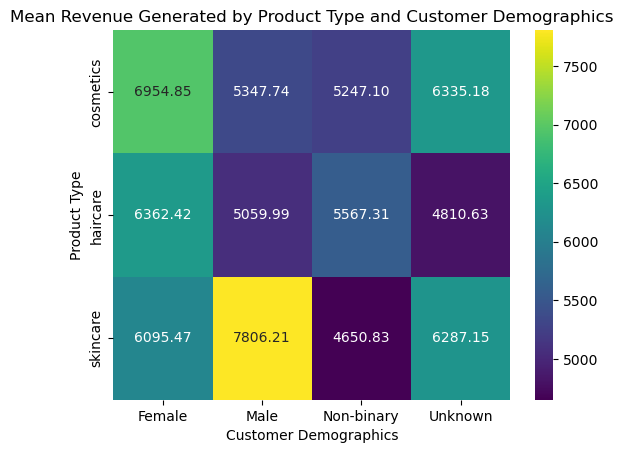

<Figure size 2000x600 with 0 Axes>

In [44]:
# Pivot the DataFrame to create a matrix where the rows are product types,
# the columns are customer demographics, and the values are revenue generated
pivot_df = df.pivot_table(index='Product type', columns=['Customer demographics'], values='Revenue generated', aggfunc='mean' ,observed=True)

# Create a heatmap using seaborn
sns.heatmap(pivot_df,   annot=True, cmap='viridis', fmt=".2f")

# Set the chart title and labels
plt.title('Mean Revenue Generated by Product Type and Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.figure(figsize=(20, 6)) 
# Show the plot
plt.show()

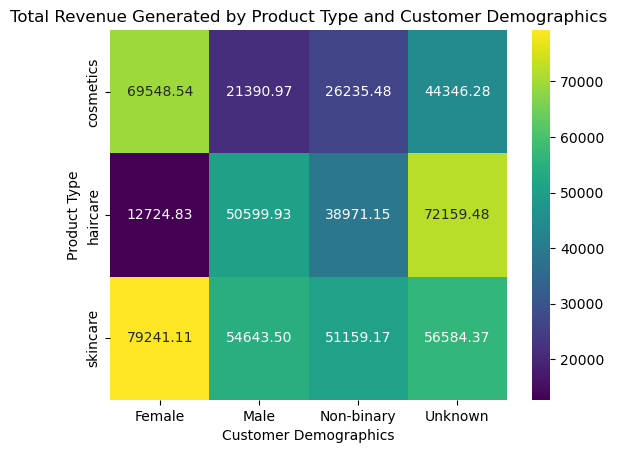

<Figure size 2000x600 with 0 Axes>

In [45]:
# Pivot the DataFrame to create a matrix where the rows are product types,
# the columns are customer demographics, and the values are revenue generated
pivot_df = df.pivot_table(index='Product type', columns=['Customer demographics'], values='Revenue generated', aggfunc='sum' ,observed=True)

# Create a heatmap using seaborn
sns.heatmap(pivot_df,   annot=True, cmap='viridis', fmt=".2f")

# Set the chart title and labels
plt.title('Total Revenue Generated by Product Type and Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Product Type')
plt.figure(figsize=(20, 6)) 
# Show the plot
plt.show()

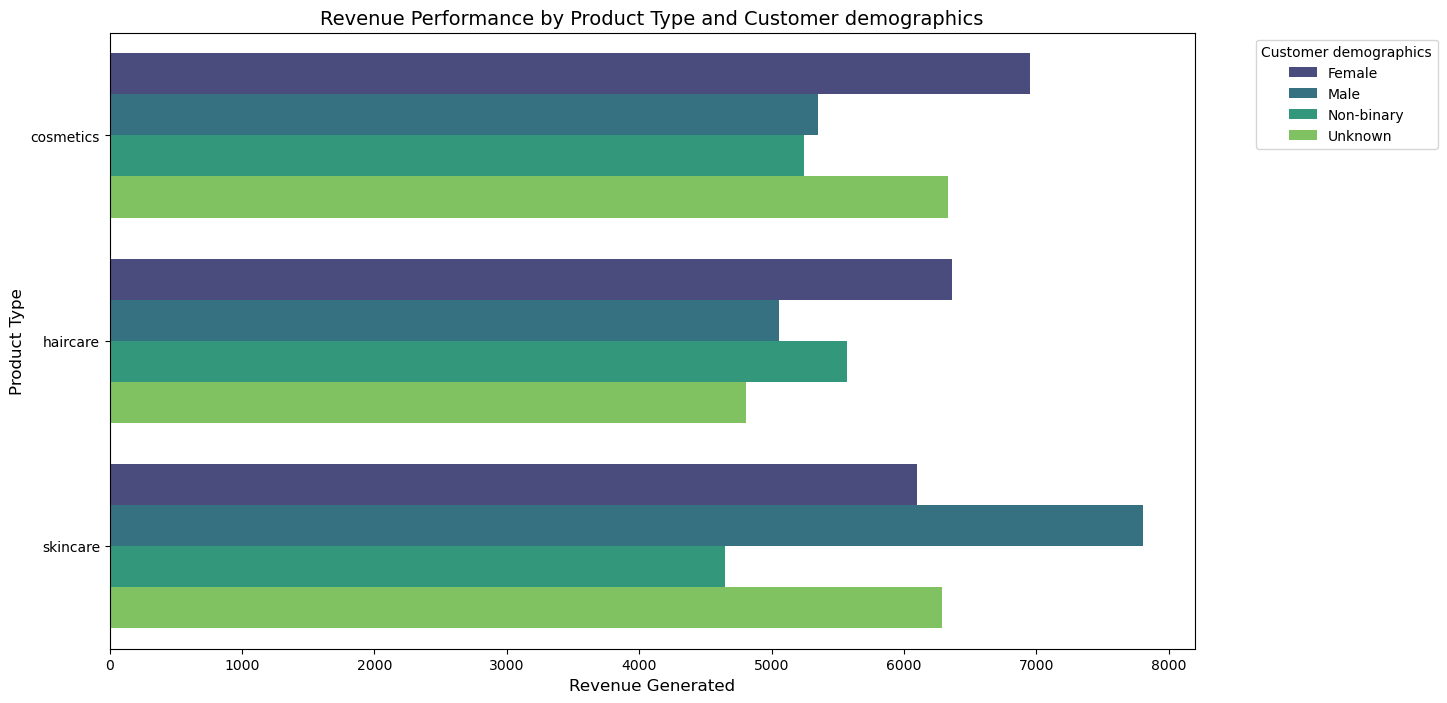

In [46]:
# Create a bar plot to show total sales for each Category by Region
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Revenue generated', y='Product type', hue='Customer demographics', errorbar=None, palette='viridis')

# Set labels and title
plt.xlabel('Revenue Generated', fontsize=12)
plt.ylabel('Product Type', fontsize=12)
plt.title('Revenue Performance by Product Type and Customer demographics', fontsize=14)
plt.legend(title='Customer demographics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## How do Supplier influence purchasing behavior of different Product types?

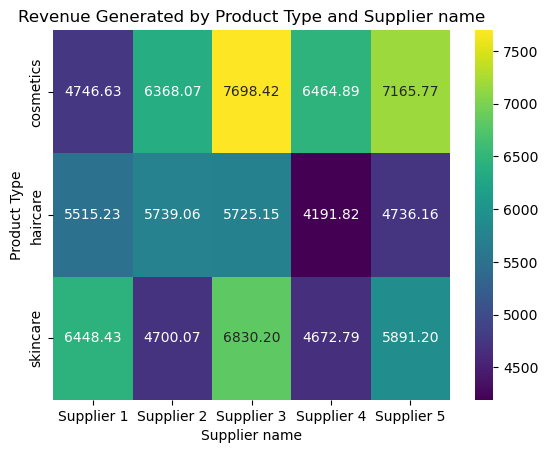

<Figure size 2000x600 with 0 Axes>

In [48]:
# Pivot the DataFrame to create a matrix where the rows are product types,
# the columns are Supplier name, and the values are revenue generated
pivot_df = df.pivot_table(index='Product type', columns=['Supplier name'], values='Revenue generated', aggfunc='mean' ,observed=True)

# Create a heatmap using seaborn
sns.heatmap(pivot_df,   annot=True, cmap='viridis', fmt=".2f")

# Set the chart title and labels
plt.title('Revenue Generated by Product Type and Supplier name')
plt.xlabel('Supplier name')
plt.ylabel('Product Type')
plt.figure(figsize=(20, 6)) 
# Show the plot
plt.show();

# What is the Impact of Transportation modes on Manufacturing lead time ?

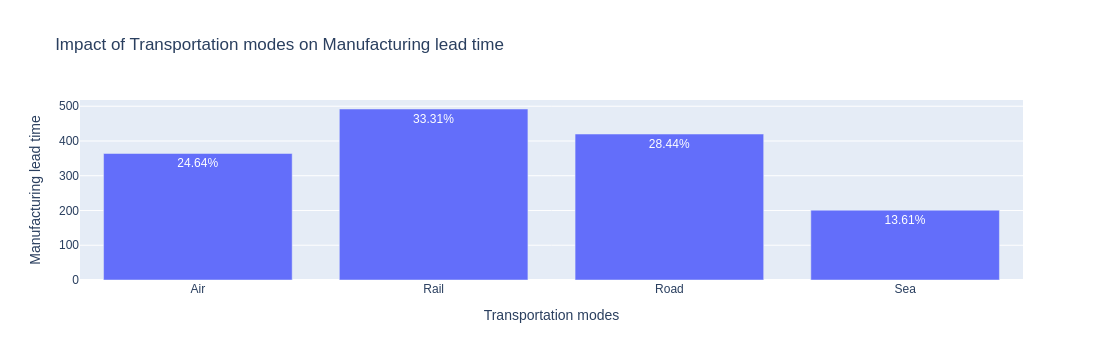

In [50]:
revenue_by_product = df.groupby('Transportation modes', observed=True)['Manufacturing lead time'].sum().reset_index()
# Calculate the total revenue
total_revenue = revenue_by_product['Manufacturing lead time'].sum()

# Calculate the percentage of total revenue for each product type
revenue_by_product['Percent of Total'] = ((revenue_by_product['Manufacturing lead time'] / total_revenue) * 100).round(2).astype(str) + '%'

fig = px.bar(revenue_by_product, x='Transportation modes', y='Manufacturing lead time', title='Impact of Transportation modes on Manufacturing lead time', text='Percent of Total')
fig.update_xaxes(title_text='Transportation modes')  # Update x-axis label
fig.update_yaxes(title_text='Manufacturing lead time')  # Update y-axis label
fig.show()

# using  Logistic Regression (Multi-class Classification) for predict Supplier name

### as we found a weak  Correlations between Supplier name and many attributes,
### we investment this inspit of this may not be usefull for decision maker   

Accuracy: 0.20


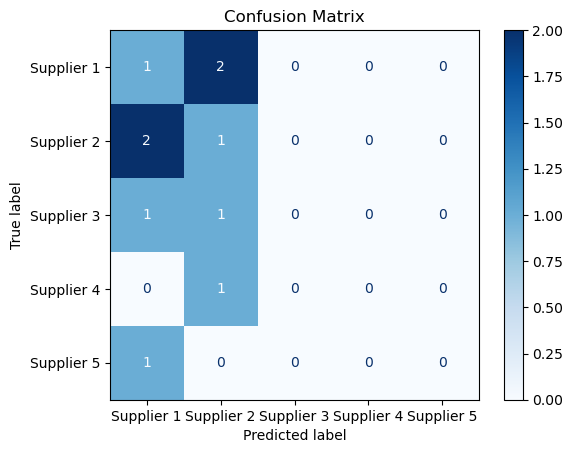

In [87]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert 'Product type' into dummy variables
X = pd.get_dummies(df['Product type'], drop_first=True).astype(np.int64)

# Encoding 'Supplier name' for multiclass classification
le = LabelEncoder()  # Make sure to define LabelEncoder
y = le.fit_transform(df['Supplier name'])

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the coefficients
coefficients = model.coef_
#print("Coefficients:")
#print(coefficients)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.30


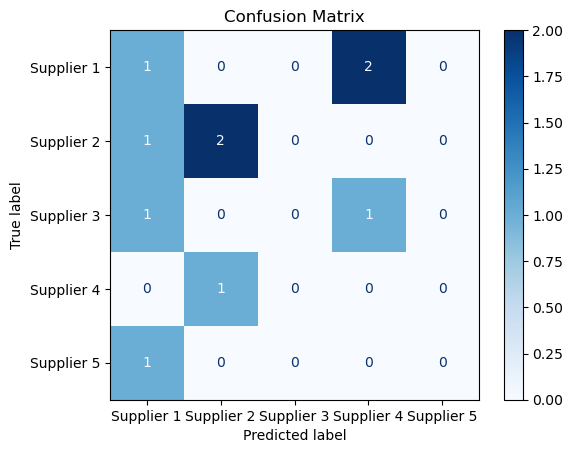

In [89]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert 'Product type' and 'Transportation modes' into dummy variables
product_type_dummies = pd.get_dummies(df['Product type'], drop_first=True).astype(np.int64)
transportation_mode_dummies = pd.get_dummies(df['Transportation modes'], drop_first=True).astype(np.int64)

# Combine both sets of dummy variables
X = pd.concat([product_type_dummies, transportation_mode_dummies], axis=1)



# Encoding 'Supplier name' for multiclass classification
le = LabelEncoder()  # Make sure to define LabelEncoder
y = le.fit_transform(df['Supplier name'])

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the coefficients
coefficients = model.coef_
#print("Coefficients:")
#print(coefficients)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


Accuracy: 0.40


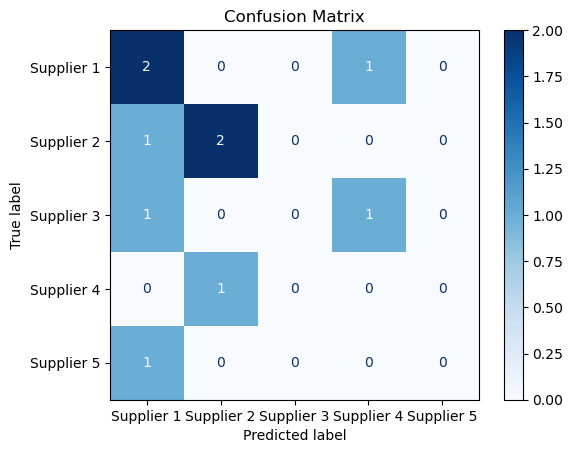

In [96]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Step 1: Convert 'Product type' and 'Transportation modes' and 'Inspection results' into dummy variables
product_type_dummies = pd.get_dummies(df['Product type'], drop_first=True).astype(np.int64)
transportation_mode_dummies = pd.get_dummies(df['Transportation modes'], drop_first=True).astype(np.int64)
Inspection_results = pd.get_dummies(df['Inspection results'], drop_first=True).astype(np.int64)

# Combine both sets of dummy variables
X = pd.concat([product_type_dummies, transportation_mode_dummies,Inspection_results], axis=1)

# Encoding 'Supplier name' for multiclass classification
le = LabelEncoder()  # Make sure to define LabelEncoder
y = le.fit_transform(df['Supplier name'])

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Step 3: Train a Logistic Regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = model.predict(X_test)

# Step 5: Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print the coefficients
coefficients = model.coef_
#print("Coefficients:")
#print(coefficients)

# Step 6: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
